<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GCN-File" data-toc-modified-id="GCN-File-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GCN File</a></span></li><li><span><a href="#Steady-State" data-toc-modified-id="Steady-State-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Steady State</a></span></li><li><span><a href="#Moments" data-toc-modified-id="Moments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Moments</a></span></li></ul></div>

In [1]:
import gEconpy as ge
import gEconpy.plotting as gp

# GCN File

With good inital guesses, you could get away with not writing down the whole steady state system. But if you're going to do estimation, it's really important to provide as much analytic steady state as possible, so it's a good habit to get into. If you pass the complete system, the optimizer can be removed from the estimation process entirely, which gives *dramatic* speedups.

In [2]:
with open('basic_new_keynesian.gcn') as file:
    print(file.read())

block STEADY_STATE
{
	identities
	{
		nu[ss] = 0;
		zeta[ss] = 1;
		A[ss] = 1;
		
		pi[ss] = pi_star;
		P_tilde[ss] = ((1 - theta * pi[ss] ^ (epsilon - 1)) / (1 - theta)) ^ (1 / (1 - epsilon));
		P_star[ss] = (1 - theta) * P_tilde[ss] ^ (-epsilon) / (1 - theta * pi[ss] ^ epsilon);
		mc[ss] = (epsilon - 1) / epsilon * (1 - beta * theta * pi[ss] ^ epsilon) / 
			(1 - beta * theta * pi[ss] ^ (epsilon - 1)) * P_tilde[ss];
	
		r_G[ss] = pi[ss] / beta;
		r[ss] = 1 / beta - (1 - delta);
		w[ss] = (1 - alpha) * mc[ss] ^ (1 / (1 - alpha)) * (alpha / r[ss]) ^ (alpha / (1 - alpha));
		Y[ss] = (1 - alpha * delta * mc[ss] * P_star[ss] / r[ss]) ^ (-sigma_C / (sigma_H + sigma_C))
			* (w[ss] ^ (1 + sigma_H) / (chi_H * ((1  - alpha) * P_star[ss] * mc[ss]) ^ sigma_H)) ^ (1 / (sigma_H + sigma_C));
		Y_f[ss] = Y[ss] * P_star[ss];
		K[ss] = alpha * mc[ss] * Y_f[ss] / r[ss];
		H[ss] = (1 - alpha) * mc[ss] * Y_f[ss] / w[ss];
		I[ss] = delta * K[ss];
		C[ss] = Y[ss] - I[ss];
		
		lambda[ss] = C[ss] ^ (-sigma

# Steady State

In [3]:
mod = ge.gEconModel('basic_new_keynesian.gcn')

Model Building Complete.
Found:
	23 equations
	23 variables
	The following "variables" were defined as constants and have been substituted away:
		B_t
	3 stochastic shocks
		 0 / 3 has a defined prior. 
	15 parameters
		 0 / 15 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [4]:
mod.steady_state()
mod.print_steady_state()

Steady state found! Sum of squared residuals is 2.293017541592844e-30
A_ss                1.000
C_ss                0.995
Div_ss              0.201
H_ss                0.523
I_ss                0.216
K_ss                8.630
LHS_ss              5.072
P_star_ss           1.001
P_tilde_ss          1.016
RHS_ss              4.294
TC_ss              -1.010
U_ss             -124.282
Y_f_ss              1.212
Y_ss                1.211
lambda_ss           1.010
mc_ss               0.833
nu_ss               0.000
pi_ss               1.005
q_ss                1.010
r_G_ss              1.015
r_ss                0.035
w_ss                1.352
zeta_ss             1.000


# Moments

Remember that a big difference between gEconpy and Dynare is that gEconpy log-linearizes the all variables by default when computing the first-order perturbation solution. This can be disabled on a variable-by-variable basis using the `not_loglin_variable` argument of `solve_model`. Anyway, a result of this is that moments and policy functions will not be the same between the two softwares. To get the exact Dynare output, pass all variables to `not_loglin_variable`.

In [5]:
mod.solve_model(not_loglin_variable=[x.base_name for x in mod.variables])

Solution found, sum of squared residuals:  5.160461616472751e-25
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [6]:
cov = mod.compute_stationary_covariance_matrix()
autocorr = mod.compute_autocorrelation_matrix()

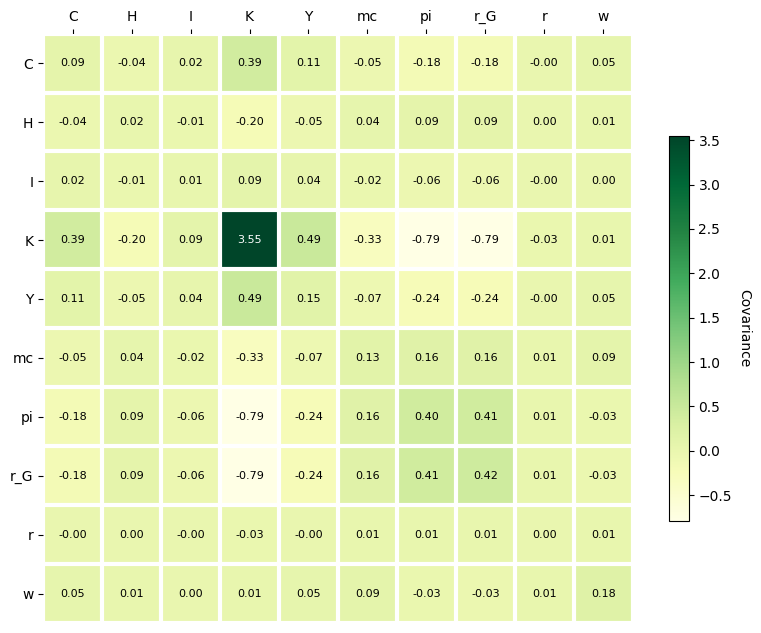

In [7]:
gp.plot_covariance_matrix(cov, vars_to_plot=['C', 'H', 'I', 'K', 'Y', 'mc', 'pi', 'r_G', 'r', 'w'], cbar_kw={'shrink':0.5});

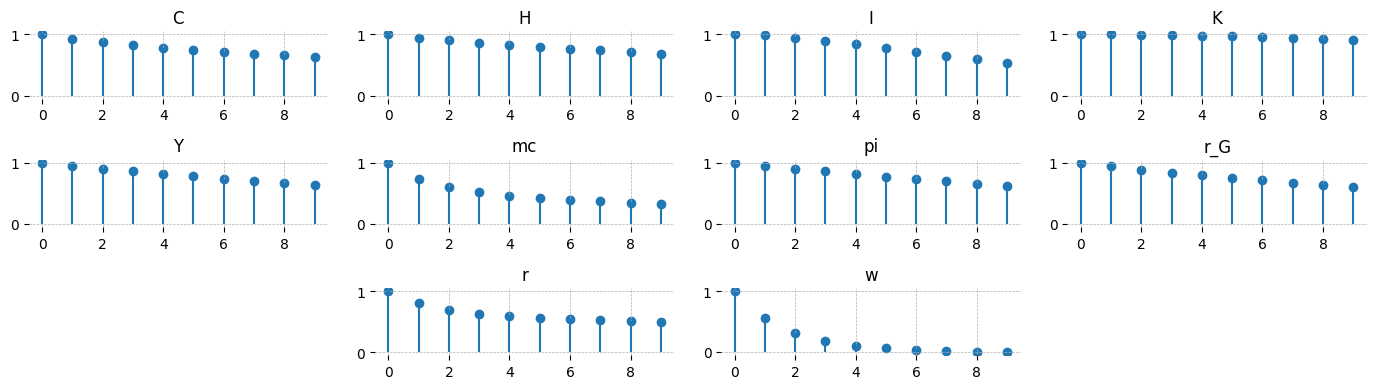

In [8]:
gp.plot_acf(autocorr, vars_to_plot=['C', 'H', 'I', 'K', 'Y', 'mc', 'pi', 'r_G', 'r', 'w']);